In [4]:
import numpy as np
from scipy.integrate import odeint

import matplotlib.animation as anim
import matplotlib.pyplot as plt
from matplotlib.patches import Circle

## Set the initial parameters for the double pendulum:

theta1 and theta2 are $\theta_1$ and $\theta_2$ respectively, and v1 and v2 are $\dot{\theta}_1$ and $\dot{\theta}_2$ respectively. 

The masses and lengths can also be set.

In [41]:
theta1, theta2 = np.pi/4, np.pi/3
v1, v2 = 0, 0

l1, l2 = 1, 1
m1, m2 = 1, 2
g = 9.81

### Main code

In [33]:
def derive(state, t, l1, l2, m1, m2):

    theta1, v1, theta2, v2 = state
    cos_theta, sin_theta = np.cos(theta1 - theta2), np.sin(theta1 - theta2)
    deriv_theta1, deriv_theta2 = v1, v2

    deriv_v1 = m2*g*np.sin(theta2)*cos_theta 
    deriv_v1 -= m2*sin_theta*(l1*v1**2*cos_theta + l2*v2**2)
    deriv_v1 -= (m1 + m2)*g*np.sin(theta1)
    deriv_v1 /= l1*(m1 + m2*sin_theta**2)

    deriv_v2 = (m1 + m2)*(l1*v1**2*sin_theta - g*np.sin(theta2) + g*np.sin(theta1)*cos_theta)
    deriv_v2 += m2*l2*v2**2*sin_theta*cos_theta
    deriv_v2 /= l2*(m1 + m2*sin_theta**2)

    return deriv_theta1, deriv_v1, deriv_theta2, deriv_v2

def E_state(state):
    theta1, v1, theta2, v2 = state.T
    potential = -(m1 + m2)*l1*g*np.cos(theta1) - m2*l2*g*np.cos(theta2)
    kinetic = 0.5*m1*(l1*v1)**2 + 0.5*m2*((l1*v1)**2 + (l2*v2)**2 + 2*l1*l2*v1*v2*np.cos(theta1-theta2))
    return potential, kinetic



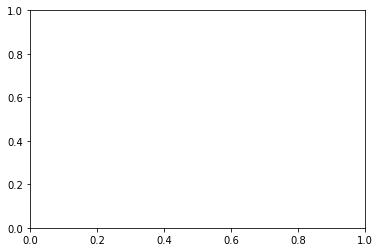

In [49]:
t = np.arange(0, 50 + 0.01, 0.01)
theta_0 = np.array([theta1, v1, theta2, v2])

theta = odeint(derive, theta_0, t, args = (l1, l2, m1, m2))

theta_1, theta_2 = theta[:, 0], theta[:, 2]

x1, y1 = l1 * np.sin(theta_1), -l1*np.cos(theta_1)
x2 = x1 + l2*np.sin(theta_2)
y2 = y1 - l2*np.cos(theta_2)


#Make a plot for a given time t

def make_plot(t):
    ax.plot([0, x1[t], x2[t]], [0, y1[t], y2[t]], lw = 2, c = 'k')

    c_rotation = Circle((0, 0), 0.02, fc = 'k', zorder = 3)
    c1 = Circle((x1[t], y1[t]), 0.05, fc = 'r', zorder = 3)
    c2 = Circle((x2[t], y2[t]), 0.05, fc = 'b', zorder = 3)
    ax.add_patch(c_rotation)
    ax.add_patch(c1)
    ax.add_patch(c2)

    ax.set_xlim(-l1-l2-0.05, l1+l2+0.05)
    ax.set_ylim(-l1-l2-0.05, l1+l2+0.05)
    ax.set_aspect('equal', adjustable='box')
    plt.axis('off')
    plt.cla()



fig = plt.figure()
ax = fig.add_subplot(111)

animation = anim.FuncAnimation(fig, make_plot)
plt.show()
